In [1]:
#Hipótesis. Dado que el surf nació en la costa oeste de EEUU, se plantea que el mayor número de ataques de tiburones a surfistas se ha producido en la costa oeste de EEUU.

#Buscar:
#Filtrar el DataFrame para la actividad surf
#Filtrar el DataFrame para la costa oeste. Country == USA  & Areas: Alaska, Hawai, California, Oregon y Washington
#La suma del número de casos de 'Surfing' de la costa oeste debe ser mayor a la suma de casos de 'Surfing' en otros países u otras áreas de EEUU
#Puede ser interesante buscar la moda de Area por Country en Surfing
#Puede ampliarse para saber si verano es la época del año con mayor número de ataques, ya que agosto y septiembre son los mejores meses para surfear

In [204]:
#Limpieza de datos.

#Crear un DataFrame a partir del DataFrame original con las columnas más interesantes para analizar la hipótesis
#Columnas de interés: Case Number, Country, Area, Date, Year, Location, Activity, 'Injury', 'Fatal (Y/N)'

#Renombrar las columnas para que no tengan espacio en el nombre

#Revisar los datos duplicados en Case Number, si no están duplicados en todos los campos, asignar una letra al final. O eliminar los 32 registros.

#Eliminar en los países los '?'

#En Países, reescribir a primera en mayúscula y el resto en minúscula

#Agrupar por continente

#Revisar los años. Si los dos últimos dígitos de 'Year' no coincide con los dos últimos dígitos de 'Date', sobreescribir 'Date' con el año.

In [205]:
#Importar módulos

import pandas as pd
import numpy as np
import re
import sys

In [206]:
#Creación de la base de datos

df = pd.read_csv('input/GSAF5.csv', engine = 'python')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [207]:
#Conocer la base de datos

df.shape

(5992, 24)

In [208]:
#Conocer cuántos registros nulos hay en cada columna

df.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [209]:
#Conocer las columnas
df.columns

#Comprobamos que hay columnas que tienen espacio en el nombre. 
#Eliminar el espacio de aquellos con la función str.rstrip()
df.columns = df.columns.str.rstrip()
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [210]:
#Seleccionar las columnas necesarias para el estudio de la hipótesis: Case Number, Country, Area, Date, Year, Location, Activity, 'Injury', 'Fatal (Y/N)'

shark_df = df[['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)']]
shark_df.head()

,Case Number,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N


In [211]:
#Revisar si existen duplicados en la columna 'Case Number'

shark_df['Case Number'].duplicated().value_counts()

False    5976
True       16
Name: Case Number, dtype: int64

In [213]:
#Existen 16 'Case Number' duplicados. 
#Comprobar si son el mismo caso. Para ser el mismo caso se establece que debe ser misma 'Date', mismo 'Country', misma 'Area' y misma 'Activity'

#shark_df[shark_df['Case Number'].duplicated(keep=False)][['Case Number', 'Date', 'Country', 'Area', 'Activity']]

#Crear una función para que revise si son dos 'Case Number' iguales compruebe los otros campos. Si los campos son iguales, elimina uno de los dos. si los campos son distintos, añade 'x' al final de 'Case Number'. Se añade 'x' porque en el caso de que haya un 'Case Number' similar con una letra, no sea la b o c. 



duplicates = shark_df[shark_df['Case Number'].duplicated(keep=False)]['Case Number'].tolist()
set_duplicates = set(duplicates)
set_duplicates

for dup in set_duplicates:
    a=shark_df[(shark_df['Case Number'] == dup)]
    # df.loc[nameindex [: nameindex2 ], namecol [: namecol2]]
    # df.loc[a.iloc[1,:].name  ,   "Case Number"]
    # a.iloc[ 1 , :]
    shark_df.loc[a.iloc[1,:].name,"Case Number"] = shark_df.loc[a.iloc[1,:].name]["Case Number"] + "z"

shark_df

,Case Number,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N
...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y
5988,ND.0004,Before 1903,0,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y
5989,ND.0003,1900-1905,0,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y
5990,ND.0002,1883-1889,0,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,NaN,FATAL,Y


In [214]:
#Alternativa para eliminar duplicados y sobreescribir el Case Number

'''index = []

for i in shark_df[shark_df['Case Number'].duplicated()].index:
    index.append(i)

shark_df = shark_df.drop(index,axis=0)

for i in index:
    shark_df[shark_df['Case Number'][i]] = shark_df[shark_df['Case Number'][i] +" z"]

new_shark_df

'''

'index = []\n\nfor i in shark_df[shark_df[\'Case Number\'].duplicated()].index:\n    index.append(i)\n\nshark_df = shark_df.drop(index,axis=0)\n\nfor i in index:\n    shark_df[shark_df[\'Case Number\'][i]] = shark_df[shark_df[\'Case Number\'][i] +" z"]\n\nnew_shark_df\n\n'

In [215]:
#Comprobar que no hay registros duplicados
shark_df.duplicated().value_counts()

False    5992
dtype: int64

In [216]:
#Filtrar el DataFrame solo por la actividad 'Surfing'

shark_df = shark_df[shark_df.Activity == 'Surfing']
shark_df.head()

,Case Number,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N


In [217]:
#Conocer cuántos ataques a surfistas ha habido

surf_df = shark_df[(shark_df['Activity'] == 'Surfing')]
surf_df.shape

#904 ataques a surfistas

(904, 12)

In [218]:
#Conteo de ataques a surfistas por países

surf_df.Country.value_counts()

#USA es el país donde mayor ataques a surfistas se producen, 534.

USA                           534
AUSTRALIA                     170
SOUTH AFRICA                   93
BRAZIL                         35
REUNION                        20
NEW ZEALAND                    12
MEXICO                          6
INDONESIA                       5
ECUADOR                         4
COSTA RICA                      3
EL SALVADOR                     2
JAPAN                           2
NEW CALEDONIA                   2
FIJI                            2
VENEZUELA                       2
GREECE                          1
URUGUAY                         1
CANADA                          1
FRENCH POLYNESIA                1
UNITED ARAB EMIRATES (UAE)      1
MEXICO                          1
DOMINICAN REPUBLIC              1
SCOTLAND                        1
OKINAWA                         1
MOZAMBIQUE                      1
BAHAMAS                         1
ANGOLA                          1
Name: Country, dtype: int64

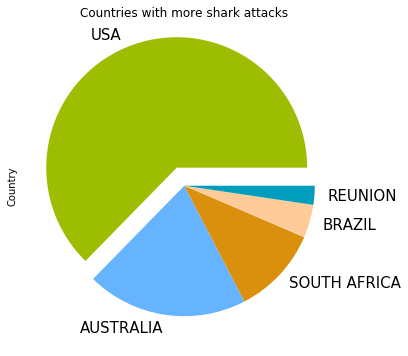

In [219]:
#Pintar una gráfica con los 5 países con mayor registro de ataques por tiburón.

%matplotlib inline
surf_df.Country.value_counts().nlargest(5).plot.pie(labels=['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'BRAZIL', 'REUNION'], fontsize=15, figsize=(6, 6), colors = ('#9dbd00','#66b3ff','#db900d','#ffcc99','#009dbd'), explode=(0.15, 0, 0, 0, 0), title = 'Countries with more shark attacks')

In [220]:
#Seleccionar las regiones de la costa oeste de USA. Areas: Alaska, Hawai, California, Oregon y Washington

surf_west = surf_df.loc[(surf_df.Area.isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington')))]
surf_west.shape

(94, 12)

In [221]:
#Contar ataques de tiburón a surfistas en el resto del mundo

surf_out = surf_df.loc[(~surf_df.Area.isin(('Alaska', 'Hawai', 'California', 'Oregon', 'Washington')))]
surf_out.shape

(810, 12)

In [222]:
#Buscar los áreas donde mayor número de ataques se han producido a surfistas
surf_df[['Country', 'Area']]['Area'].value_counts()

#Florida es el área donde mayor número de ataques a surfistas se han producido.

Florida                  349
New South Wales           88
California                72
Eastern Cape Province     55
Hawaii                    52
                        ... 
Saint-Gilles               1
Eastern Province           1
British Colombia           1
Saint Leu                  1
Kochi Prefecture           1
Name: Area, Length: 71, dtype: int64

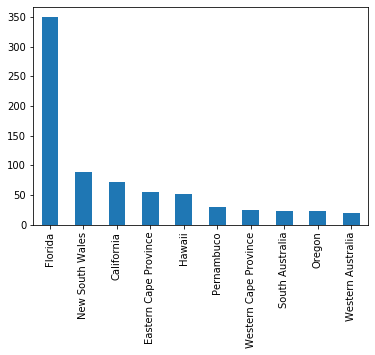

In [223]:
#Gráfico para saber en qué áreas se producen más ataques a surfistas
surf_df[['Country', 'Area']]['Area'].value_counts().nlargest(10).plot.bar()

#Se demuestra que Florida, en la costa este de USA es la zona con mayor número de ataques, negando la hipótesis planteada inicialmente.

In [ ]:
surf_df.to_csv()

In [12]:
#Revisar los ataques que tengan una 'Activity' no registrada
shark_df['Activity'].isnull().value_counts() 

#527 ataques no indican cuál fue la 'Activity'

False    5465
True      527
Name: Activity, dtype: int64

In [238]:
#Para deducir si alguno de esos 527 ataques que no tienen 'Activity' declarada han podido ser a surfistas...
#Analizar 'Injury' a surfistas
shark_df[(shark_df['Activity'] == 'Surfing')]['Injury'].value_counts()

#Foot bitten y  son los valores que más se repiten
#Comprobar si en otras 'Activity' foot y board también aparecen con mucha frecuencia

#shark_df['Injury'].value_counts()


FATAL                                                          33
Foot bitten                                                    31
Left foot bitten                                               24
No injury, board bitten                                        20
Right foot bitten                                              16
                                                               ..
Lacerations to shin                                             1
Minor lacerations on foot                                       1
Foot bitten after he stepped on the shark PROVOKED INCIDENT     1
Right arm & fingers lacerated                                   1
Non-fatal                                                       1
Name: Injury, Length: 574, dtype: int64

In [245]:
#Tomar 'board' como referencia de actividad de surf, si la Activity es nula para ese registro.
filter_1=(shark_df['Injury'].str.contains(' board ', na=False, regex=False))
filter_2=(shark_df['Injury'].str.contains('on board ', na=False, regex=False))
filter_3=(shark_df['Injury'].str.contains('off board ', na=False, regex=False))
new_shark_df = surf_df[filter_1 & ~filter_2 & ~filter_3]

In [247]:
new_shark_df.shape

(56, 12)

In [249]:
new_shark_df[(new_shark_df['Activity'] != 'Surfing')]

,Case Number,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
